<div class="alert alert-block alert-success">
    <b><center>CONVOLUTON NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from ipywidgets import interact
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Data

In [4]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = tf.keras.datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Preprocessing Data

In [5]:
# # 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28, 28, 1)
testDatas = testDatas.reshape(-1, 28, 28, 1)

# trainDatas.shape, testDatas.shape

In [6]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [7]:
model = models.Sequential([
    layers.Input([28, 28, 1]),
    layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation=tf.keras.activations.relu),
    layers.Dropout(0.2),
    layers.Dense(10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

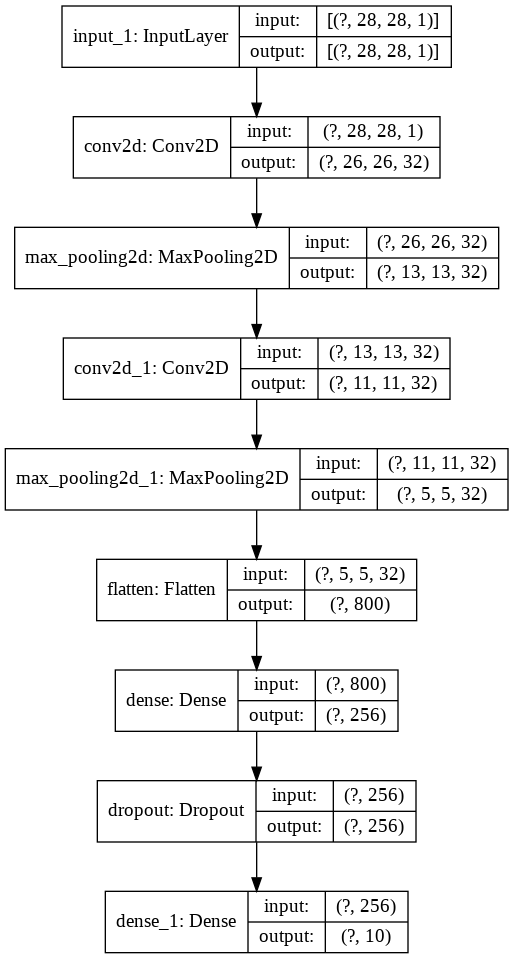

In [8]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [9]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["accuracy"]
)

# Training

In [10]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/sample - loss: 15.2698 - accuracy: 0.3281 - val_loss: 1.8382 - val_accuracy: 0.7652
Epoch 2/20
48000/48000 [==============================] - 0s 7us/sample - loss: 2.6648 - accuracy: 0.7141 - val_loss: 0.8513 - val_accuracy: 0.8767
Epoch 3/20
48000/48000 [==============================] - 0s 6us/sample - loss: 1.3920 - accuracy: 0.8173 - val_loss: 0.5714 - val_accuracy: 0.9123
Epoch 4/20
48000/48000 [==============================] - 0s 7us/sample - loss: 0.9429 - accuracy: 0.8606 - val_loss: 0.4280 - val_accuracy: 0.9283
Epoch 5/20
48000/48000 [==============================] - 0s 7us/sample - loss: 0.6505 - accuracy: 0.8896 - val_loss: 0.3408 - val_accuracy: 0.9377
Epoch 6/20
48000/48000 [==============================] - 0s 7us/sample - loss: 0.5065 - accuracy: 0.9067 - val_loss: 0.2857 - val_accuracy: 0.9457
Epoch 7/20
48000/48000 [==============================] - 0s

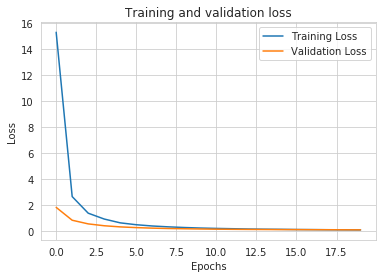

In [11]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [12]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels, verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(0.10018725308476714, '97.23 %')

# Predict

In [13]:
@interact(idx=(0, 10000, 1))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data.astype(float))
    
    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…

# Error Find

In [28]:
errsIdx = []
testDatas = testDatas.reshape(-1, 28, 28, 1)
dataPred = model.predict(testDatas.astype(float))

for idx in range(10000):
    if np.argmax(dataPred[idx]) != np.argmax(testLabels[idx]):
        errsIdx.append(idx)

In [29]:
errsIdx

[18,
 95,
 195,
 259,
 266,
 320,
 359,
 406,
 445,
 449,
 490,
 495,
 543,
 578,
 582,
 591,
 619,
 659,
 684,
 720,
 740,
 881,
 882,
 926,
 939,
 959,
 962,
 965,
 982,
 1014,
 1039,
 1107,
 1112,
 1114,
 1119,
 1166,
 1173,
 1181,
 1194,
 1226,
 1232,
 1242,
 1247,
 1260,
 1290,
 1299,
 1319,
 1328,
 1393,
 1403,
 1438,
 1447,
 1522,
 1527,
 1530,
 1549,
 1553,
 1570,
 1609,
 1611,
 1621,
 1678,
 1681,
 1691,
 1709,
 1717,
 1721,
 1737,
 1754,
 1790,
 1850,
 1868,
 1901,
 1941,
 2016,
 2035,
 2043,
 2070,
 2107,
 2109,
 2129,
 2130,
 2135,
 2162,
 2174,
 2182,
 2185,
 2189,
 2272,
 2293,
 2299,
 2308,
 2339,
 2369,
 2371,
 2387,
 2393,
 2417,
 2447,
 2459,
 2488,
 2496,
 2582,
 2597,
 2607,
 2630,
 2635,
 2654,
 2730,
 2771,
 2823,
 2896,
 2907,
 2919,
 2939,
 2953,
 2964,
 2970,
 2979,
 2990,
 2995,
 3012,
 3030,
 3060,
 3073,
 3100,
 3225,
 3316,
 3326,
 3333,
 3344,
 3381,
 3437,
 3451,
 3503,
 3520,
 3549,
 3558,
 3662,
 3702,
 3726,
 3727,
 3762,
 3767,
 3796,
 3806,
 3808,
 3